<a href="https://colab.research.google.com/github/mr-nastik/UrbanSound8k/blob/main/4s_sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH='/content/gdrive/My Drive/urbansound8k/'

In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (266 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 160983 files and directories currently installed.)
Preparing to 

In [ ]:
!pip install pyaudio

  Created wheel for pyaudio: filename=PyAudio-0.2.11-cp37-cp37m-linux_x86_64.whl size=52589 sha256=dac8cff3b38afb967757272d7bb5f26cb7e089628a7c34f6b3ad012a74fc39e6
  Stored in directory: /root/.cache/pip/wheels/f4/a8/a4/292214166c2917890f85b2f72a8e5f13e1ffa527c4200dcede
Successfully built pyaudio


In [ ]:
!sudo apt-get install libsndfile1-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsndfile1-dev is already the newest version (1.0.28-4ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import librosa
from IPython.display import Audio
from tqdm.auto import tqdm
import keras

In [ ]:
df=pd.read_csv(PATH+'UrbanSound8K.csv')


In [ ]:
k=6246
sound,sr=librosa.load(PATH+'fold'+str(df['fold'][k])+'/'+df['slice_file_name'][k],res_type='kaiser_fast',duration=4)
print(len(sound))

88200


In [ ]:
print(sr*4)

88200


In [ ]:
Audio(sound,rate=sr)

In [ ]:
i=0
while(len(sound)<88200):
    sound+=[sound[i]]
    i+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: ignored

In [ ]:
Audio(sound,rate=sr)

In [ ]:
len(sound)

88200

In [ ]:
df=pd.read_csv(PATH+'UrbanSound8K.csv')
print(df.head())

      slice_file_name    fsID  start  ...  fold  classID             class
0    100032-3-0-0.wav  100032    0.0  ...     5        3          dog_bark
1  100263-2-0-117.wav  100263   58.5  ...     5        2  children_playing
2  100263-2-0-121.wav  100263   60.5  ...     5        2  children_playing
3  100263-2-0-126.wav  100263   63.0  ...     5        2  children_playing
4  100263-2-0-137.wav  100263   68.5  ...     5        2  children_playing

[5 rows x 8 columns]


In [ ]:
df['fsID']

0       100032
1       100263
2       100263
3       100263
4       100263
         ...  
8727     99812
8728     99812
8729     99812
8730     99812
8731     99812
Name: fsID, Length: 8732, dtype: int64

In [ ]:
X=[]
Y=[]
for i in tqdm(range(8732)):
    data,sr=librosa.load(PATH+'fold'+str(df['fold'][i])+'/'+df['slice_file_name'][i],res_type='kaiser_best',mono=True,duration=4)
    j=0
    while(len(data)<4*sr):
        data=np.append(data,data[j])
        j+=1
    data=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=60)
    X.append(data)
    Y.append(df['classID'][i])


In [ ]:
X=np.asarray(X)
Y=np.array(Y)
Y=keras.utils.to_categorical(Y)
X.shape
Y.shape

(8732, 10)

In [ ]:
np.save(PATH+'mfcc_CNN_60_kb_4s_X.npy',X)

In [ ]:
np.save(PATH+'mfcc_CNN_60_kb_4s_Y.npy',Y)

In [ ]:
X.shape

(8732, 60, 173)

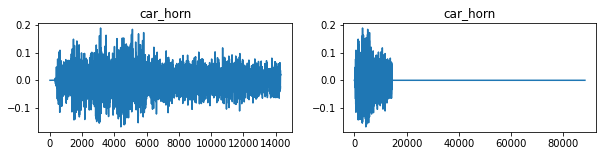

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(10, 2))
ax = ax.flatten()
a=[0,0]
k=9
i=0
sound,sr=librosa.load(PATH+'fold'+str(df['fold'][k])+'/'+df['slice_file_name'][k],res_type='kaiser_fast')
ax[i].set_title(df['class'][k])
ax[i].plot(sound)
i+=1
z=0;
while(len(sound)<88200):
    sound=np.append(sound,0)
    z+=1
ax[i].set_title(df['class'][k])
ax[i].plot(sound) 